In [ ]:
#Importing packages
import pandas as pd
from custom_functions import *
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump,load
from sklearn import metrics
import warnings
import dtale
%matplotlib inline
pd.options.display.float_format = '{:.4f}'.format
np.set_printoptions(suppress=True)
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [39]:
df = pd.read_excel("Telco_Customer_Churn.xlsx")

In [40]:
df.shape

(6000, 21)

In [41]:
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No     1.0   
1     5575-GNVDE    Male              0      No         No    34.0   
2     3668-QPYBK    Male              0      No         No     2.0   
3     7795-CFOCW    Male              0      No         No    45.0   
4     9237-HQITU  Female              0      No         No     2.0   
...          ...     ...            ...     ...        ...     ...   
5995  2193-SFWQW    Male              0     Yes        Yes    72.0   
5996  5656-JAMLX    Male              0      No         No    62.0   
5997  3462-BJQQA  Female              0      No         No     6.0   
5998  0442-TDYUO     NaN              0     Yes         No    48.0   
5999  6733-LRIZX    Male              0      No         No    35.0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
0              No  No phone service           

## EDA using dtale

In [ ]:
# dtale.show(df)

In [43]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,151.65,Yes


In [44]:
df.set_index('customerID',inplace=True)

In [45]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,151.65,Yes


In [47]:
df.shape

(6000, 20)

<AxesSubplot:xlabel='SeniorCitizen'>

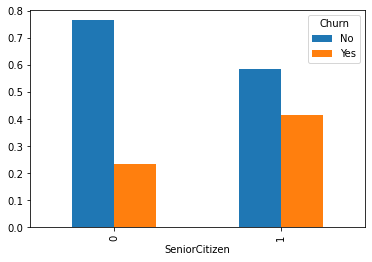

In [48]:
pd.crosstab(df['SeniorCitizen'],df['Churn'],normalize='index').plot(kind='bar')

<AxesSubplot:xlabel='gender'>

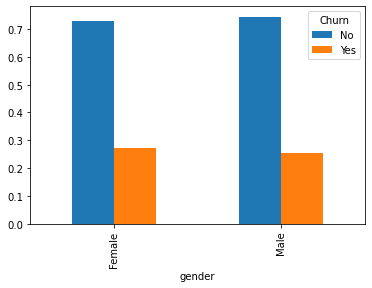

In [49]:
pd.crosstab(df['gender'],df['Churn'],normalize='index').plot(kind='bar')

In [50]:
df.groupby('Churn')['TotalCharges'].mean()

Churn
No     2514.354338
Yes    1504.023729
Name: TotalCharges, dtype: float64

## Checking Data types

In [51]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## Converting SeniorCitizen to Object as it is nominal variable

In [52]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)

In [20]:
df.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## Missing Values Check

In [53]:
df.isna().mean()*100

gender               5.000000
SeniorCitizen        0.000000
Partner              0.000000
Dependents           0.000000
tenure               8.133333
PhoneService         0.000000
MultipleLines        0.000000
InternetService      0.000000
OnlineSecurity       0.000000
OnlineBackup         0.000000
DeviceProtection     0.000000
TechSupport          0.000000
StreamingTV          0.000000
StreamingMovies      0.000000
Contract             0.000000
PaperlessBilling     0.000000
PaymentMethod        0.000000
MonthlyCharges       9.583333
TotalCharges        12.550000
Churn                0.000000
dtype: float64

## Missing Values imputation

### Gender

In [54]:
df['gender'].fillna(df['gender'].mode()[0],inplace=True)

## Tenure

In [24]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [55]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tenure'>

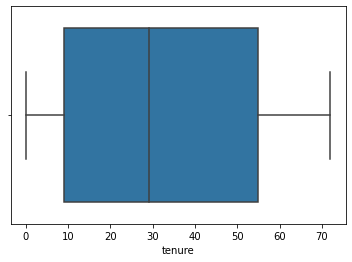

In [56]:
sns.boxplot(df['tenure'])

In [57]:
df['tenure'].fillna(df['tenure'].median(),inplace=True)

### MonthlyCharges

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyCharges'>

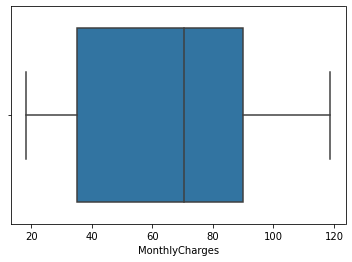

In [58]:
sns.boxplot(df['MonthlyCharges'])

In [59]:
df['MonthlyCharges'].fillna(df['MonthlyCharges'].median(),inplace=True)

### TotalCharges

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalCharges'>

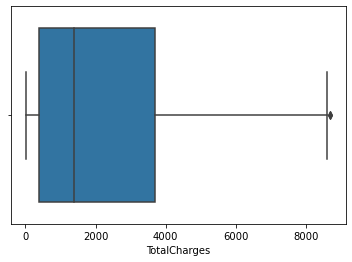

In [60]:
sns.boxplot(df['TotalCharges'])

In [61]:
df['TotalCharges'].fillna(df['TotalCharges'].median(),inplace=True)

In [62]:
df.isna().mean()*100

gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [63]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.30,151.65,Yes


## Columns categorization

In [64]:
nominal_cols = ['gender','SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
               'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
               'StreamingMovies','PaperlessBilling', 'PaymentMethod']

ordinal_cols = ['Contract']

numeric_cols = ['tenure','MonthlyCharges', 'TotalCharges']

target  = ['Churn']

## Imbalance Check

In [65]:
df['Churn'].value_counts()/len(df)*100

No     73.566667
Yes    26.433333
Name: Churn, dtype: float64

## Outlier Analysis

In [66]:
from sklearn.covariance import EllipticEnvelope

# Drop rows with missing values in numeric columns
df = df.dropna(subset=numeric_cols)

# Fit the Elliptic Envelope model
model_ee = EllipticEnvelope(contamination=0.05)
model_ee.fit(df[numeric_cols])

# Save the model object
from joblib import dump
dump(model_ee, "mp1_outliers.joblib")

# Predict the anomaly score for each data point
df['anomaly_score'] = model_ee.predict(df[numeric_cols])

# Get the indices of data points with anomaly scores equal to -1 (outliers)
ee_index = list(df[df['anomaly_score'] == -1].index)


In [67]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,anomaly_score
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1
3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1
9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.30,151.65,Yes,1


In [68]:
len(ee_index)

300

In [69]:
df.drop(ee_index,inplace=True)

In [40]:
df.shape

(6000, 20)

In [409]:
del df['anomaly_score']

In [410]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1.0000,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.8500,29.8500,No
5575-GNVDE,Male,0,No,No,34.0000,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.9500,1889.5000,No
3668-QPYBK,Male,0,No,No,2.0000,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.8500,108.1500,Yes
7795-CFOCW,Male,0,No,No,45.0000,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3000,1840.7500,No
9237-HQITU,Female,0,No,No,2.0000,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.3000,151.6500,Yes


## Treating categorical variable

## Target Variable

In [70]:
# Replace 'Yes' with 1 and 'No' with 0
df['Churn'].replace({'Yes': 1, 'No': 0}, inplace=True)

In [71]:
# Check the value counts to ensure the conversion was successful
df['Churn'].value_counts()

0    4135
1    1565
Name: Churn, dtype: int64

## Numeric Columns

## Standardization

In [76]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler object
sc = StandardScaler()

# Fit StandardScaler on numerical columns of df
sc.fit(df[numeric_cols])

StandardScaler()

In [77]:
dump(sc,"mp1_Standardsc.joblib")

['mp1_Standardsc.joblib']

In [86]:
from joblib import dump

dump(sc, 'mp1_Standardsc.joblib')


['mp1_Standardsc.joblib']

In [87]:
from joblib import load


In [88]:
sc_mp1 = load('mp1_Standardsc.joblib')


In [90]:
sc_df = pd.DataFrame(sc_mp1.transform(df[numeric_cols]),columns=numeric_cols,index=df.index)
sc_df

,tenure,MonthlyCharges,TotalCharges
customerID,,,
7590-VHVEG,-1.288253,-1.200455,-0.995064
5575-GNVDE,0.155781,-0.244634,-0.075052
3668-QPYBK,-1.244494,-0.353972,-0.956327
7795-CFOCW,0.637125,-0.761342,-0.099169
9237-HQITU,-1.244494,0.226222,-0.934807
...,...,...,...
9661-ACXBS,0.505849,1.457150,1.167322
5656-JAMLX,1.381021,-1.553157,-0.389621
3462-BJQQA,-1.069460,0.912226,-0.736423


In [91]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,anomaly_score
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1
5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,1
3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1
7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,1
9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.30,151.65,1,1


In [92]:
df.drop(columns=numeric_cols,inplace=True)

In [93]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,anomaly_score
customerID,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0,1
5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0,1
3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,1,1
7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0,1
9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1,1


In [94]:
df = pd.concat([df,sc_df],axis=1)

In [95]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,anomaly_score,tenure,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,0,1,-1.288253,-1.200455,-0.995064
5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,...,No,No,One year,No,Mailed check,0,1,0.155781,-0.244634,-0.075052
3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,...,No,No,Month-to-month,Yes,Mailed check,1,1,-1.244494,-0.353972,-0.956327
7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,One year,No,Bank transfer (automatic),0,1,0.637125,-0.761342,-0.099169
9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,...,No,No,Month-to-month,Yes,Electronic check,1,1,-1.244494,0.226222,-0.934807


## Ordinal Variables

In [96]:
df['Contract'].value_counts()

Month-to-month    3296
Two year          1221
One year          1183
Name: Contract, dtype: int64

In [97]:
df['Contract'].replace({'Month-to-month':1,'One year':2,'Two year':3},inplace=True)

In [98]:
input_cols = nominal_cols+ordinal_cols+numeric_cols

## Nominal Variables

In [99]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder(sparse=False,handle_unknown='ignore',dtype=int,drop='first')
oh.fit(df[nominal_cols])
dump(oh,"mp1_OneHot.joblib")
oh_df = pd.DataFrame(oh.transform(df[nominal_cols]),columns=oh.get_feature_names(nominal_cols),index=df.index)
oh_df

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
5575-GNVDE,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3668-QPYBK,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
7795-CFOCW,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9237-HQITU,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9661-ACXBS,0,0,0,0,1,0,1,1,0,0,...,0,0,0,1,0,1,1,0,1,0
5656-JAMLX,1,0,0,0,1,0,0,0,1,1,...,1,0,1,0,1,0,0,0,0,0
3462-BJQQA,0,0,0,0,1,0,1,1,0,0,...,0,0,0,1,0,0,1,0,1,0


In [100]:
df.drop(columns=nominal_cols,inplace=True)
df = pd.concat([df,oh_df],axis=1)
df

,Contract,Churn,anomaly_score,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,1,-1.288253,-1.200455,-0.995064,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
5575-GNVDE,2,0,1,0.155781,-0.244634,-0.075052,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3668-QPYBK,1,1,1,-1.244494,-0.353972,-0.956327,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
7795-CFOCW,2,0,1,0.637125,-0.761342,-0.099169,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9237-HQITU,1,1,1,-1.244494,0.226222,-0.934807,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9661-ACXBS,1,1,1,0.505849,1.457150,1.167322,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
5656-JAMLX,3,0,1,1.381021,-1.553157,-0.389621,1,0,0,0,...,1,0,1,0,1,0,0,0,0,0
3462-BJQQA,1,0,1,-1.069460,0.912226,-0.736423,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [101]:
df.shape

(5700, 31)

In [102]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [429]:
X.dtypes

Contract                                   int64
tenure                                   float64
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                                int32
SeniorCitizen_1                            int32
Partner_Yes                                int32
Dependents_Yes                             int32
PhoneService_Yes                           int32
MultipleLines_No phone service             int32
MultipleLines_Yes                          int32
InternetService_Fiber optic                int32
InternetService_No                         int32
OnlineSecurity_No internet service         int32
OnlineSecurity_Yes                         int32
OnlineBackup_No internet service           int32
OnlineBackup_Yes                           int32
DeviceProtection_No internet service       int32
DeviceProtection_Yes                       int32
TechSupport_No internet service            int32
TechSupport_Yes     

In [105]:
import matplotlib.pyplot as plt

<AxesSubplot:>

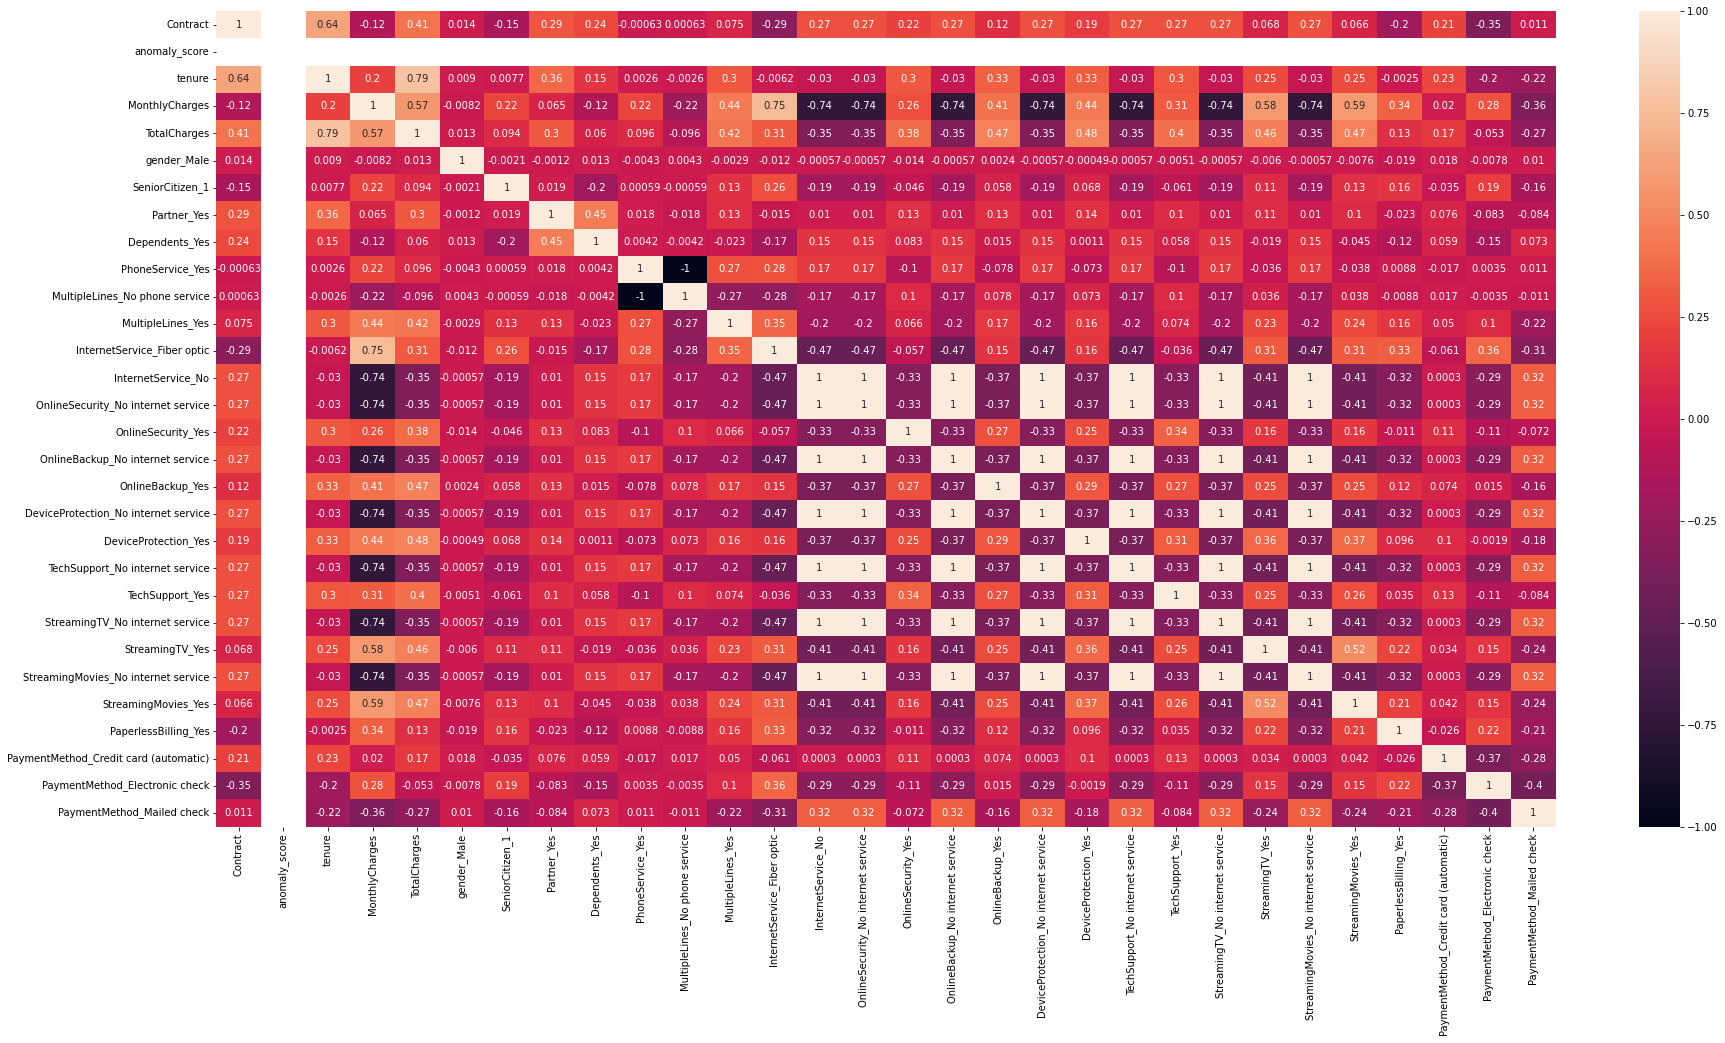

In [106]:
plt.rcParams['figure.figsize'] = [30,15]
sns.heatmap(X.corr(),annot=True)

## Multicollinearity

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
  
print(vif_data.sort_values(by='VIF',ascending=False))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                                  feature        VIF
16       OnlineBackup_No internet service        inf
13                     InternetService_No        inf
20        TechSupport_No internet service        inf
14     OnlineSecurity_No internet service        inf
24    StreamingMovies_No internet service        inf
18   DeviceProtection_No internet service        inf
9                        PhoneService_Yes        inf
10         MultipleLines_No phone service        inf
22        StreamingTV_No internet service        inf
3                          MonthlyCharges  11.407917
4                            TotalCharges   5.729569
2                                  tenure   4.592379
12            InternetService_Fiber optic   3.965016
0                                Contract   2.319867
28         PaymentMethod_Electronic check   2.014484
25                    StreamingMovies_Yes   1.901876
23                        StreamingTV_Yes   1.876284
29             PaymentMethod_Mailed check   1.

In [108]:
high_vif_cols = ['TechSupport_No internet service',
'DeviceProtection_No internet service',
'OnlineBackup_No internet service',
'OnlineSecurity_No internet service',
'InternetService_No',
'StreamingTV_No internet service',
'StreamingMovies_No internet service',
'PhoneService_Yes',
'MonthlyCharges']

In [109]:
X.drop(columns=high_vif_cols,inplace=True)
X

,Contract,anomaly_score,tenure,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,1,-1.288253,-0.995064,0,0,1,0,1,0,...,0,1,0,0,0,0,1,0,1,0
5575-GNVDE,2,1,0.155781,-0.075052,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
3668-QPYBK,1,1,-1.244494,-0.956327,1,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,1
7795-CFOCW,2,1,0.637125,-0.099169,1,0,0,0,1,0,...,1,0,1,1,0,0,0,0,0,0
9237-HQITU,1,1,-1.244494,-0.934807,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9661-ACXBS,1,1,0.505849,1.167322,0,0,0,0,0,1,...,1,0,1,0,1,1,1,0,1,0
5656-JAMLX,3,1,1.381021,-0.389621,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3462-BJQQA,1,1,-1.069460,-0.736423,0,0,0,0,0,1,...,0,1,0,0,1,0,1,0,1,0


## Train test split

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [111]:
X_train.shape,y_train.shape

((4560, 21), (4560,))

In [112]:
X_test.shape,y_test.shape

((1140, 21), (1140,))

## Training models

In [113]:
metric_df = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall','f1_Score'])

In [114]:
metric_df

,Model,Accuracy,Precision,Recall,f1_Score


## 1) Naive Bayes

Accuracy:  0.7552631578947369
Precision:  0.539906103286385
Recall:  0.7348242811501597
F1 score:  0.6224627875507442


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


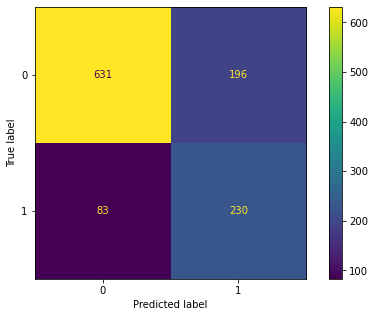

In [118]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from joblib import dump

# Set the figure size
plt.rcParams['figure.figsize'] = [8,5]

# Create a Naive Bayes classifier object
nb = GaussianNB()

# Fit the classifier to the training data
nb.fit(X_train, y_train)

# Predict class labels on the test data
y_pred = nb.predict(X_test)

# Calculate performance metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

# Print the performance metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1_score)

# Generate a confusion matrix plot
plot_confusion_matrix(nb, X_test, y_test)

import pickle

# Save the trained model to a pickle file
with open("mp1_nb.pkl", "wb") as f:
    pickle.dump(nb, f)


In [119]:
metric_df.loc[len(metric_df)] = (['Naive Bayes',metrics.accuracy_score(y_test,y_pred),metrics.precision_score(y_test,y_pred)
                 ,metrics.recall_score(y_test,y_pred),metrics.f1_score(y_test,y_pred)])
metric_df

,Model,Accuracy,Precision,Recall,f1_Score
0,Naive Bayes,0.755263,0.539906,0.734824,0.622463


## KNN

Accuracy:  0.7710526315789473
Precision:  0.5935251798561151
Recall:  0.5271565495207667
F1 Score:  0.5583756345177665


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


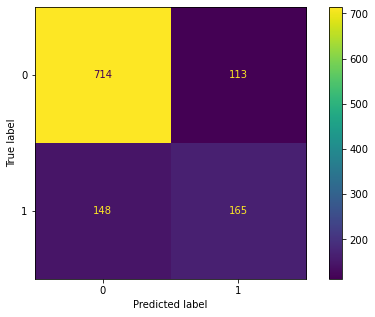

In [120]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

metrics.plot_confusion_matrix(knn, X_test, y_test)

In [121]:
metric_df.loc[len(metric_df)] = (['KNN',metrics.accuracy_score(y_test,y_pred),metrics.precision_score(y_test,y_pred)
                 ,metrics.recall_score(y_test,y_pred),metrics.f1_score(y_test,y_pred)])
metric_df

,Model,Accuracy,Precision,Recall,f1_Score
0,Naive Bayes,0.755263,0.539906,0.734824,0.622463
1,KNN,0.771053,0.593525,0.527157,0.558376


## Logistic Regression

Accuracy:  0.7921052631578948
Precision:  0.6637931034482759
Recall:  0.49201277955271566
F1 Score:  0.565137614678899


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


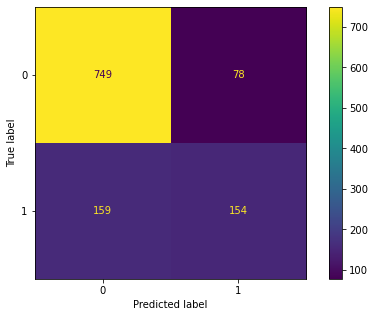

In [122]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train, y_train)

y_pred = lg.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

metrics.plot_confusion_matrix(lg, X_test, y_test)

In [123]:
metric_df.loc[len(metric_df)] = (['Logistic Regression',metrics.accuracy_score(y_test,y_pred),metrics.precision_score(y_test,y_pred)
                 ,metrics.recall_score(y_test,y_pred),metrics.f1_score(y_test,y_pred)])
metric_df

,Model,Accuracy,Precision,Recall,f1_Score
0,Naive Bayes,0.755263,0.539906,0.734824,0.622463
1,KNN,0.771053,0.593525,0.527157,0.558376
2,Logistic Regression,0.792105,0.663793,0.492013,0.565138


## SVM

Accuracy :  0.7903508771929825
Precision :  0.6651785714285714
Recall :  0.476038338658147
f1 Score :  0.5549348230912476


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


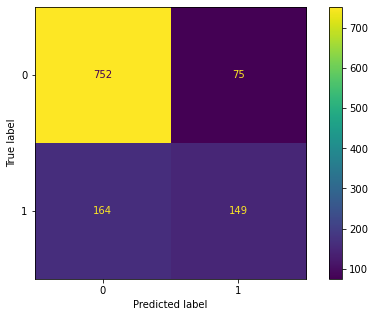

In [124]:
from sklearn.svm import SVC

# create an instance of the SVC model
sv = SVC()

# fit the model to the training data
sv.fit(X_train, y_train)

# make predictions on the test data
y_pred = sv.predict(X_test)

# print evaluation metrics
print("Accuracy : ",metrics.accuracy_score(y_test,y_pred))
print("Precision : ",metrics.precision_score(y_test,y_pred))
print("Recall : ",metrics.recall_score(y_test,y_pred))
print("f1 Score : ",metrics.f1_score(y_test,y_pred))

# plot confusion matrix
metrics.plot_confusion_matrix(sv,X_test,y_test)


In [125]:
metric_df.loc[len(metric_df)] = (['SVM',metrics.accuracy_score(y_test,y_pred),metrics.precision_score(y_test,y_pred)
                 ,metrics.recall_score(y_test,y_pred),metrics.f1_score(y_test,y_pred)])
metric_df

,Model,Accuracy,Precision,Recall,f1_Score
0,Naive Bayes,0.755263,0.539906,0.734824,0.622463
1,KNN,0.771053,0.593525,0.527157,0.558376
2,Logistic Regression,0.792105,0.663793,0.492013,0.565138
3,SVM,0.790351,0.665179,0.476038,0.554935


## Decision Tree

Accuracy :  0.7280701754385965
Precision :  0.5047923322683706
Recall :  0.5047923322683706
f1 Score :  0.5047923322683706


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


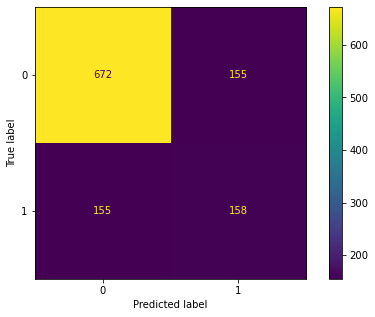

In [126]:
from sklearn.tree import DecisionTreeClassifier

# Train the decision tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predict on the test set and evaluate performance
y_pred = dt.predict(X_test)
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))
print("Precision : ", metrics.precision_score(y_test, y_pred))
print("Recall : ", metrics.recall_score(y_test, y_pred))
print("f1 Score : ", metrics.f1_score(y_test, y_pred))

# Plot the confusion matrix
metrics.plot_confusion_matrix(dt, X_test, y_test)


In [127]:
metric_df.loc[len(metric_df)] = (['Decsion Tree',metrics.accuracy_score(y_test,y_pred),metrics.precision_score(y_test,y_pred)
                 ,metrics.recall_score(y_test,y_pred),metrics.f1_score(y_test,y_pred)])
metric_df

,Model,Accuracy,Precision,Recall,f1_Score
0,Naive Bayes,0.755263,0.539906,0.734824,0.622463
1,KNN,0.771053,0.593525,0.527157,0.558376
2,Logistic Regression,0.792105,0.663793,0.492013,0.565138
3,SVM,0.790351,0.665179,0.476038,0.554935
4,Decsion Tree,0.728070,0.504792,0.504792,0.504792


## Hyperparameter Tuning

#### 1) Naive Bayes

In [160]:
from sklearn.model_selection import GridSearchCV

grid_params = {'var_smoothing':[1/(10**x) for x in range(0,16)]}

nb_gs = GridSearchCV(GaussianNB(), grid_params,verbose=1, n_jobs = -1,scoring='f1',cv=3)
nb_gs.fit(X_train, y_train)
nb_gs.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


{'var_smoothing': 0.001}

Accuracy :  0.756140350877193
Precision :  0.5409836065573771
Recall :  0.7380191693290735
f1_Score :  0.6243243243243244


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


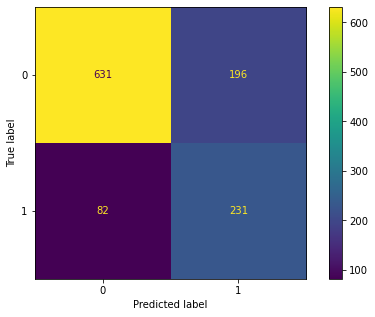

In [161]:
nb_gs = GaussianNB(var_smoothing = 0.01)
nb_gs.fit(X_train,y_train)
y_gs_pred = nb_gs.predict(X_test)
print("Accuracy : ",metrics.accuracy_score(y_test,y_gs_pred))
print("Precision : ",metrics.precision_score(y_test,y_gs_pred))
print("Recall : ",metrics.recall_score(y_test,y_gs_pred))
print("f1_Score : ",metrics.f1_score(y_test,y_gs_pred))
metrics.plot_confusion_matrix(nb_gs,X_test,y_test)

In [162]:
metric_df.loc[len(metric_df)] = (['Optimized Naive Bayes',metrics.accuracy_score(y_test,y_gs_pred),metrics.precision_score(y_test,y_gs_pred)
                 ,metrics.recall_score(y_test,y_gs_pred),metrics.f1_score(y_test,y_gs_pred)])
metric_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Optimized Naive Bayes,0.756140,0.540984,0.738019,0.624324
1,Optimized KNN,0.782456,0.628458,0.507987,0.561837
2,Optimized KNN,0.782456,0.628458,0.507987,0.561837
3,Optimized Logistic Regression,0.789474,0.656652,0.488818,0.560440
4,Optimized SVM,0.789474,0.656652,0.488818,0.560440
5,Optimized Decision Tree,0.789474,0.656652,0.488818,0.560440
6,Optimized KNN,0.789474,0.656652,0.488818,0.560440
7,Optimized Logistic Regression,0.789474,0.656652,0.488818,0.560440
8,Optimized SVM,0.789474,0.656652,0.488818,0.560440
9,Optimized Decision Tree,0.789474,0.656652,0.488818,0.560440


### KNN

In [163]:
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors' : [3,5,7,9,11,13,15,17,19],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

knn_gs = GridSearchCV(KNeighborsClassifier(), grid_params,verbose=3, n_jobs = -1,scoring='f1',cv=3)
knn_gs.fit(X_train, y_train)
knn_gs.best_params_

Fitting 3 folds for each of 54 candidates, totalling 162 fits


{'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'uniform'}

Accuracy :  0.7824561403508772
Precision :  0.6284584980237155
Recall :  0.5079872204472844
f1_Score :  0.5618374558303888


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


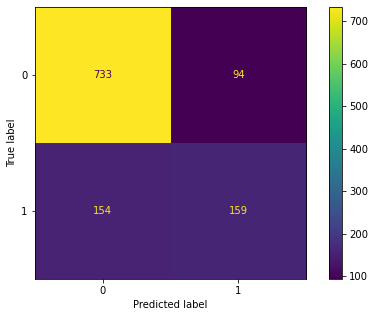

In [137]:
knn_gs = KNeighborsClassifier(metric = 'minkowski', n_neighbors = 17, weights = 'uniform')
knn_gs.fit(X_train,y_train)
y_gs_pred = knn_gs.predict(X_test)
print("Accuracy : ",metrics.accuracy_score(y_test,y_gs_pred))
print("Precision : ",metrics.precision_score(y_test,y_gs_pred))
print("Recall : ",metrics.recall_score(y_test,y_gs_pred))
print("f1_Score : ",metrics.f1_score(y_test,y_gs_pred))
metrics.plot_confusion_matrix(knn_gs,X_test,y_test)

In [164]:
metric_df.loc[len(metric_df)] = (['Optimized KNN',metrics.accuracy_score(y_test,y_gs_pred),metrics.precision_score(y_test,y_gs_pred)
                 ,metrics.recall_score(y_test,y_gs_pred),metrics.f1_score(y_test,y_gs_pred)])
metric_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Optimized Naive Bayes,0.756140,0.540984,0.738019,0.624324
1,Optimized KNN,0.782456,0.628458,0.507987,0.561837
2,Optimized KNN,0.782456,0.628458,0.507987,0.561837
3,Optimized Logistic Regression,0.789474,0.656652,0.488818,0.560440
4,Optimized SVM,0.789474,0.656652,0.488818,0.560440
5,Optimized Decision Tree,0.789474,0.656652,0.488818,0.560440
6,Optimized KNN,0.789474,0.656652,0.488818,0.560440
7,Optimized Logistic Regression,0.789474,0.656652,0.488818,0.560440
8,Optimized SVM,0.789474,0.656652,0.488818,0.560440
9,Optimized Decision Tree,0.789474,0.656652,0.488818,0.560440


### Logistic Regression

In [165]:
from sklearn.model_selection import GridSearchCV

grid_params = {'penalty':['l1', 'l2', 'elasticnet','none'],
              'C':[0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag','saga']}

lg_gs = GridSearchCV(LogisticRegression(), grid_params,verbose=1, n_jobs = -1,scoring='f1',cv=3)
lg_gs.fit(X_train, y_train)
lg_gs.best_params_

Fitting 3 folds for each of 160 candidates, totalling 480 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
216 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Va

{'C': 0.5, 'penalty': 'l1', 'solver': 'liblinear'}

Accuracy :  0.7894736842105263
Precision :  0.6566523605150214
Recall :  0.48881789137380194
f1_Score :  0.5604395604395604


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


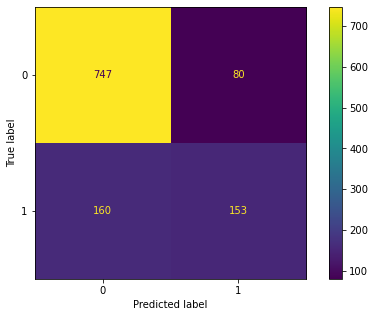

In [140]:
lg_gs = LogisticRegression(C= 0.75, penalty= 'l1', solver= 'liblinear')
lg_gs.fit(X_train,y_train)
y_gs_pred = lg_gs.predict(X_test)
print("Accuracy : ",metrics.accuracy_score(y_test,y_gs_pred))
print("Precision : ",metrics.precision_score(y_test,y_gs_pred))
print("Recall : ",metrics.recall_score(y_test,y_gs_pred))
print("f1_Score : ",metrics.f1_score(y_test,y_gs_pred))
metrics.plot_confusion_matrix(lg_gs,X_test,y_test)

In [166]:
metric_df.loc[len(metric_df)] = (['Optimized Logistic Regression',metrics.accuracy_score(y_test,y_gs_pred),metrics.precision_score(y_test,y_gs_pred)
                 ,metrics.recall_score(y_test,y_gs_pred),metrics.f1_score(y_test,y_gs_pred)])
metric_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Optimized Naive Bayes,0.756140,0.540984,0.738019,0.624324
1,Optimized KNN,0.782456,0.628458,0.507987,0.561837
2,Optimized KNN,0.782456,0.628458,0.507987,0.561837
3,Optimized Logistic Regression,0.789474,0.656652,0.488818,0.560440
4,Optimized SVM,0.789474,0.656652,0.488818,0.560440
5,Optimized Decision Tree,0.789474,0.656652,0.488818,0.560440
6,Optimized KNN,0.789474,0.656652,0.488818,0.560440
7,Optimized Logistic Regression,0.789474,0.656652,0.488818,0.560440
8,Optimized SVM,0.789474,0.656652,0.488818,0.560440
9,Optimized Decision Tree,0.789474,0.656652,0.488818,0.560440


## SVM

In [167]:
"""from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

grid_params = { 'C':[1,2,5,10],
               'kernel':['rbf','poly','sigmoid','linear'],
               'degree':[1,2,3,4,5],
               'gamma': [1, 0.1, 0.01, 0.001]}

svm_gs = RandomizedSearchCV(SVC(), grid_params,verbose=1, n_jobs = -1,scoring='f1',cv=3)
svm_gs.fit(X_train, y_train)
svm_gs.best_params_"""

"from sklearn.model_selection import GridSearchCV,RandomizedSearchCV\n\ngrid_params = { 'C':[1,2,5,10],\n               'kernel':['rbf','poly','sigmoid','linear'],\n               'degree':[1,2,3,4,5],\n               'gamma': [1, 0.1, 0.01, 0.001]}\n\nsvm_gs = RandomizedSearchCV(SVC(), grid_params,verbose=1, n_jobs = -1,scoring='f1',cv=3)\nsvm_gs.fit(X_train, y_train)\nsvm_gs.best_params_"

Accuracy :  0.7921052631578948
Precision :  0.6507936507936508
Recall :  0.5239616613418531
f1_Score :  0.5805309734513274


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


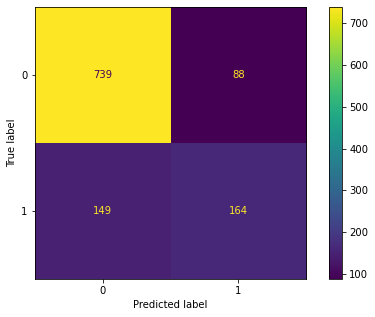

In [168]:
svm_gs = SVC(kernel= 'linear', gamma= 0.01, degree= 5, C= 5)
svm_gs.fit(X_train,y_train)
y_gs_pred = svm_gs.predict(X_test)
print("Accuracy : ",metrics.accuracy_score(y_test,y_gs_pred))
print("Precision : ",metrics.precision_score(y_test,y_gs_pred))
print("Recall : ",metrics.recall_score(y_test,y_gs_pred))
print("f1_Score : ",metrics.f1_score(y_test,y_gs_pred))
metrics.plot_confusion_matrix(svm_gs,X_test,y_test)

In [169]:
metric_df.loc[len(metric_df)] = (['Optimized SVM',metrics.accuracy_score(y_test,y_gs_pred),metrics.precision_score(y_test,y_gs_pred)
                 ,metrics.recall_score(y_test,y_gs_pred),metrics.f1_score(y_test,y_gs_pred)])
metric_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Optimized Naive Bayes,0.756140,0.540984,0.738019,0.624324
1,Optimized KNN,0.782456,0.628458,0.507987,0.561837
2,Optimized KNN,0.782456,0.628458,0.507987,0.561837
3,Optimized Logistic Regression,0.789474,0.656652,0.488818,0.560440
4,Optimized SVM,0.789474,0.656652,0.488818,0.560440
5,Optimized Decision Tree,0.789474,0.656652,0.488818,0.560440
6,Optimized KNN,0.789474,0.656652,0.488818,0.560440
7,Optimized Logistic Regression,0.789474,0.656652,0.488818,0.560440
8,Optimized SVM,0.789474,0.656652,0.488818,0.560440
9,Optimized Decision Tree,0.789474,0.656652,0.488818,0.560440


### Decision Tree

In [170]:
"""from sklearn.model_selection import GridSearchCV

grid_params = { 'criterion': ["gini", "entropy"],
                'max_depth': range(2,11),
                'min_samples_split': range(5,50,5),
                'min_samples_leaf': range(1,11),
                'ccp_alpha' : np.arange(0, 0.3, 0.03).tolist(),
               'random_state':[42]}

dt_gs = GridSearchCV(DecisionTreeClassifier(), grid_params,verbose=1, n_jobs = -1,scoring='f1',cv=3)
dt_gs.fit(X_train, y_train)
dt_gs.best_params_"""

'from sklearn.model_selection import GridSearchCV\n\ngrid_params = { \'criterion\': ["gini", "entropy"],\n                \'max_depth\': range(2,11),\n                \'min_samples_split\': range(5,50,5),\n                \'min_samples_leaf\': range(1,11),\n                \'ccp_alpha\' : np.arange(0, 0.3, 0.03).tolist(),\n               \'random_state\':[42]}\n\ndt_gs = GridSearchCV(DecisionTreeClassifier(), grid_params,verbose=1, n_jobs = -1,scoring=\'f1\',cv=3)\ndt_gs.fit(X_train, y_train)\ndt_gs.best_params_'

Accuracy :  0.7508771929824561
Precision :  0.5403899721448467
Recall :  0.6198083067092651
f1_Score :  0.5773809523809523


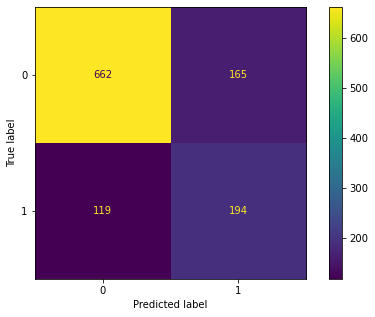

In [462]:
dt_gs = DecisionTreeClassifier(ccp_alpha= 0.0,
            criterion =  'gini',
            max_depth = 2,
            min_samples_leaf = 1,
            min_samples_split = 5,
            random_state = 42)
dt_gs.fit(X_train,y_train)
y_gs_pred = dt_gs.predict(X_test)
print("Accuracy : ",metrics.accuracy_score(y_test,y_gs_pred))
print("Precision : ",metrics.precision_score(y_test,y_gs_pred))
print("Recall : ",metrics.recall_score(y_test,y_gs_pred))
print("f1_Score : ",metrics.f1_score(y_test,y_gs_pred))
metrics.plot_confusion_matrix(dt_gs,X_test,y_test)

In [171]:
metric_df.loc[len(metric_df)] = (['Optimized Decision Tree',metrics.accuracy_score(y_test,y_gs_pred),metrics.precision_score(y_test,y_gs_pred)
                 ,metrics.recall_score(y_test,y_gs_pred),metrics.f1_score(y_test,y_gs_pred)])
metric_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Optimized Naive Bayes,0.756140,0.540984,0.738019,0.624324
1,Optimized KNN,0.782456,0.628458,0.507987,0.561837
2,Optimized KNN,0.782456,0.628458,0.507987,0.561837
3,Optimized Logistic Regression,0.789474,0.656652,0.488818,0.560440
4,Optimized SVM,0.789474,0.656652,0.488818,0.560440
5,Optimized Decision Tree,0.789474,0.656652,0.488818,0.560440
6,Optimized KNN,0.789474,0.656652,0.488818,0.560440
7,Optimized Logistic Regression,0.789474,0.656652,0.488818,0.560440
8,Optimized SVM,0.789474,0.656652,0.488818,0.560440
9,Optimized Decision Tree,0.789474,0.656652,0.488818,0.560440


In [172]:
dump(nb_gs,"mp1_best_model.joblib")

['mp1_best_model.joblib']

In [173]:
fimp = pd.DataFrame(list(zip(dt.feature_names_in_,dt.feature_importances_)),columns=['Features','Importance'])
fimp['Importance_Percent'] = fimp['Importance']*100
fimp.sort_values(by='Importance_Percent',ascending=False,inplace=True)

In [174]:
fimp['Importance_Percent'].sum()

100.00000000000001